In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('1.csv')

In [ ]:
df

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [ ]:
df = df.replace('Yes',1)
df =df.replace('No',0)

In [ ]:
std = StandardScaler()
df_scale = pd.DataFrame(std.fit_transform(df),columns = df.columns , index = df.index)

In [ ]:
df_scale

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0.612553,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252
1,0.612553,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262
2,0.612553,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767
3,0.612553,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504
4,0.612553,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,-1.632512,-0.208040,-0.205673,-0.255200,-1.336352,-1.505488,-0.126030,0.771435,-0.906289,-0.417455,-0.299280,-0.207855,-0.775861,-1.339146,1.746877,-0.706073,-0.994781,-1.483301
773,0.612553,-0.269575,-0.087284,-0.091509,-0.201858,-0.444454,-0.175543,0.165435,0.268462,0.549707,0.306784,-0.133960,0.020822,-0.319632,-0.199632,0.666685,-0.090290,1.021555
774,0.612553,-0.233895,-0.042377,-0.091509,0.365389,0.262901,-0.187095,-0.453053,-0.880670,-0.143730,0.409815,-0.827095,-0.346878,-0.319632,0.078441,-0.221570,-0.256241,-0.959029
775,0.612553,1.991711,0.177256,0.578333,3.825595,2.182866,0.312977,-0.507606,2.337894,1.963953,0.488603,1.144424,1.430339,1.107689,-2.095582,2.120194,5.887971,1.953595


In [ ]:
SSD=[]
K = range(2,31)
for k in K:
  kmeans = KMeans(n_clusters = k,random_state = 42)
  kmeans=kmeans.fit(df_scale)
  SSD.append(kmeans.inertia_)
  labels = kmeans.labels_
  print ("Silhouette score for clusters = "+str(k)+" is "
  +str(silhouette_score(df_scale,labels,metric="euclidean",sample_size=1000,random_state=42)))


Silhouette score for clusters = 2 is 0.26362003242605125
Silhouette score for clusters = 3 is 0.2265740201981683
Silhouette score for clusters = 4 is 0.20853636789363617
Silhouette score for clusters = 5 is 0.18711652825730415
Silhouette score for clusters = 6 is 0.16521249622538473
Silhouette score for clusters = 7 is 0.16307015512575782
Silhouette score for clusters = 8 is 0.15099708292474792
Silhouette score for clusters = 9 is 0.15965723685675395
Silhouette score for clusters = 10 is 0.12979011491030368
Silhouette score for clusters = 11 is 0.11949388176674378
Silhouette score for clusters = 12 is 0.12028464983729385
Silhouette score for clusters = 13 is 0.11626795253366158
Silhouette score for clusters = 14 is 0.12031985443184971
Silhouette score for clusters = 15 is 0.12384374289586715
Silhouette score for clusters = 16 is 0.11629145600578966
Silhouette score for clusters = 17 is 0.10974023736321596
Silhouette score for clusters = 18 is 0.1218973048853416
Silhouette score for clu

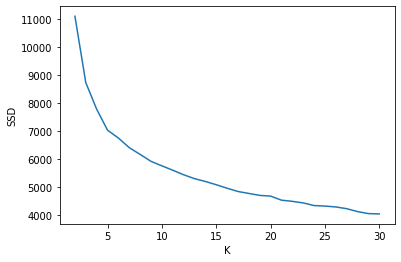

In [ ]:
plt.xlabel('K')
plt.ylabel('SSD')
plt.plot(K,SSD)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_scale)
pca_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
pca_df.head()

,principal component 1,principal component 2
0,-1.627708,0.255566
1,-2.004765,-1.195504
2,-1.201275,-1.463927
3,3.232372,-2.151148
4,-2.130789,-0.547368


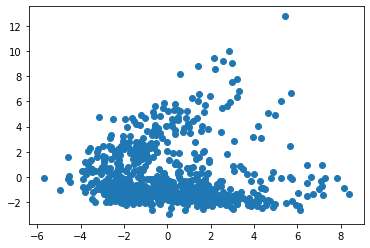

In [ ]:
plt.scatter(x=pca_df['principal component 1'], y=pca_df["principal component 2"])

In [ ]:
SSD=[]
K = range(2,31)
for k in K:
  kmeans = KMeans(n_clusters = k,random_state = 42)
  kmeans=kmeans.fit(pca_df)
  SSD.append(kmeans.inertia_)
  labels = kmeans.labels_
  print ("Silhouette score for clusters = "+str(k)+" is "
  +str(silhouette_score(pca_df,labels,metric="euclidean",sample_size=1000,random_state=42)))

Silhouette score for clusters = 2 is 0.43864052631400074
Silhouette score for clusters = 3 is 0.43954504158268964
Silhouette score for clusters = 4 is 0.4086688680782667
Silhouette score for clusters = 5 is 0.428061085616253
Silhouette score for clusters = 6 is 0.41876649033121305
Silhouette score for clusters = 7 is 0.37175428387668724
Silhouette score for clusters = 8 is 0.3759914469356779
Silhouette score for clusters = 9 is 0.38622708338694295
Silhouette score for clusters = 10 is 0.3766377249287612
Silhouette score for clusters = 11 is 0.38255260677745623
Silhouette score for clusters = 12 is 0.3701283955432121
Silhouette score for clusters = 13 is 0.37454420626584217
Silhouette score for clusters = 14 is 0.3721946470510921
Silhouette score for clusters = 15 is 0.3454161320531136
Silhouette score for clusters = 16 is 0.35702555442865724
Silhouette score for clusters = 17 is 0.35157248526423257
Silhouette score for clusters = 18 is 0.3619705145789965
Silhouette score for clusters =

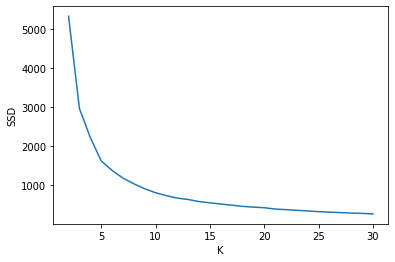

In [ ]:
plt.xlabel('K')
plt.ylabel('SSD')
plt.plot(K,SSD)

In [ ]:
kmeans= KMeans(n_clusters=3)
kmeans_best = kmeans.fit(pca_df)

In [ ]:
clusters_label= kmeans.labels_


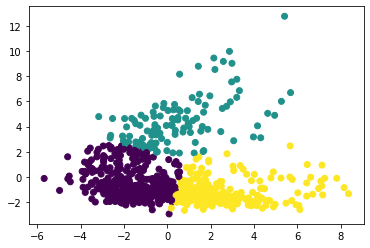

In [ ]:
plt.scatter(x=pca_df['principal component 1'], y=pca_df["principal component 2"],c = clusters_label)

In [ ]:
kmeans= KMeans(n_clusters=2)
kmeans_best = kmeans.fit(pca_df)

In [ ]:
clusters_label= kmeans.labels_


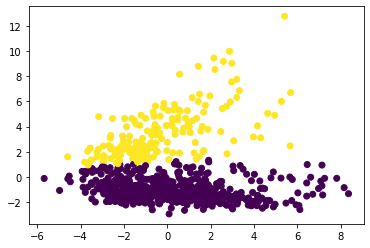

In [ ]:
plt.scatter(x=pca_df['principal component 1'], y=pca_df["principal component 2"],c = clusters_label)